In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv',
                 index_col=0, parse_dates=True)
df

,Tree Cover,Shrubland,Grassland,Cropland
date,,,,
2000-02-01,-0.074,-0.215,-0.165,0.054
2000-03-01,0.103,-0.046,-0.003,0.409
2000-04-01,0.542,0.316,0.242,0.562
2000-05-01,0.311,0.230,0.004,0.119
2000-06-01,-0.261,-0.268,-0.414,-0.426
...,...,...,...,...
2024-08-01,-0.432,-0.728,-0.710,-1.062
2024-09-01,-0.006,-0.653,-0.425,-1.174
2024-10-01,0.210,-0.444,-0.091,-0.813


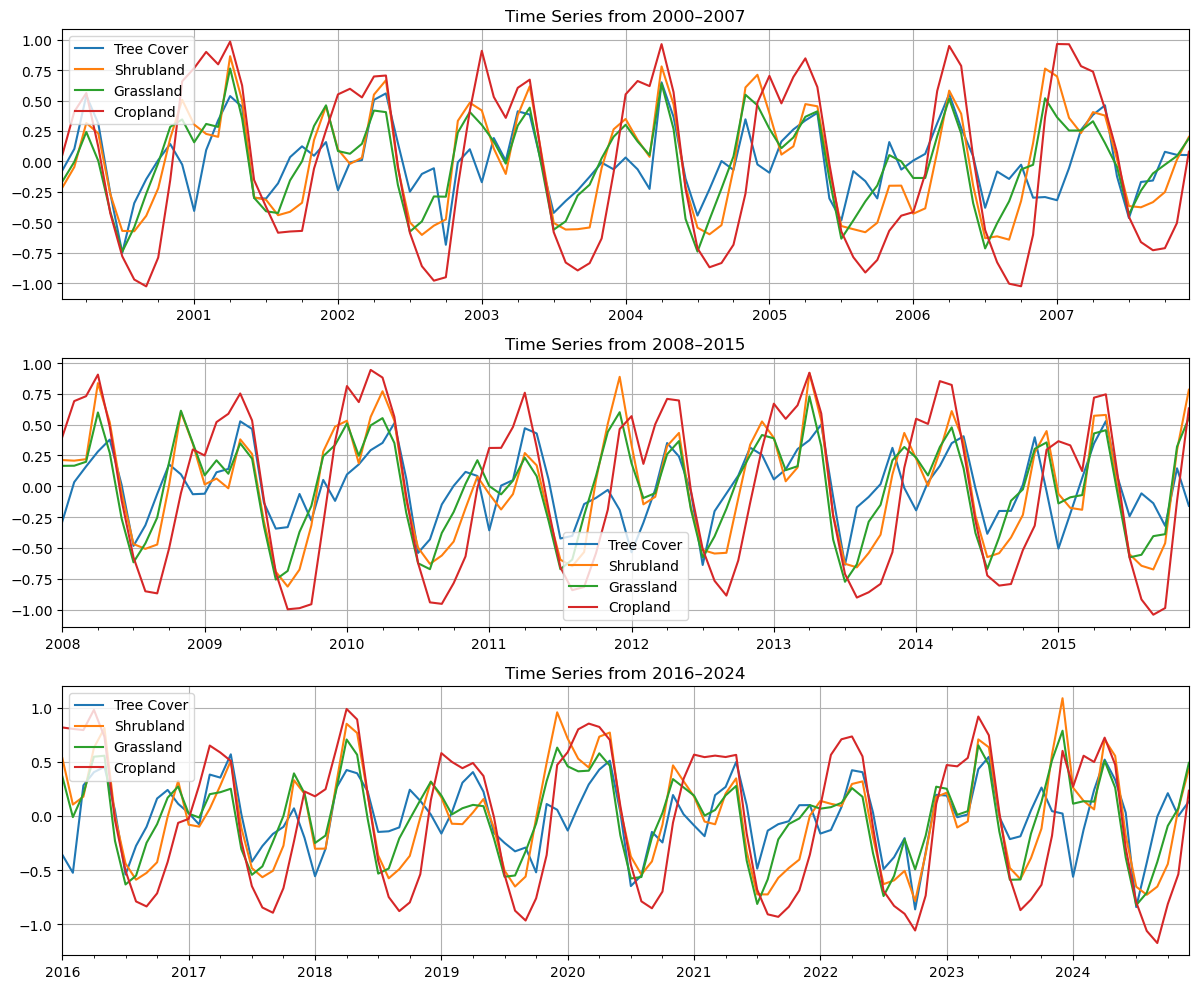

In [6]:
# Step 2: Convert 'Date' to datetime and set it as the index
#df['Date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)

# Step 3: Define the three periods
periods = {
    '2000–2007': ('2000-01-01', '2007-12-31'),
    '2008–2015': ('2008-01-01', '2015-12-31'),
    '2016–2024': ('2016-01-01', '2024-12-31'),
}

# Step 4: Create the subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharex=False)

# Step 5: Plot each period
for ax, (title, (start, end)) in zip(axes, periods.items()):
    subset = df.loc[start:end]
    subset.plot(ax=ax)
    ax.set_title(f"Time Series from {title}")
    ax.set_xlabel("")
    ax.grid(True)

plt.tight_layout()
plt.show()

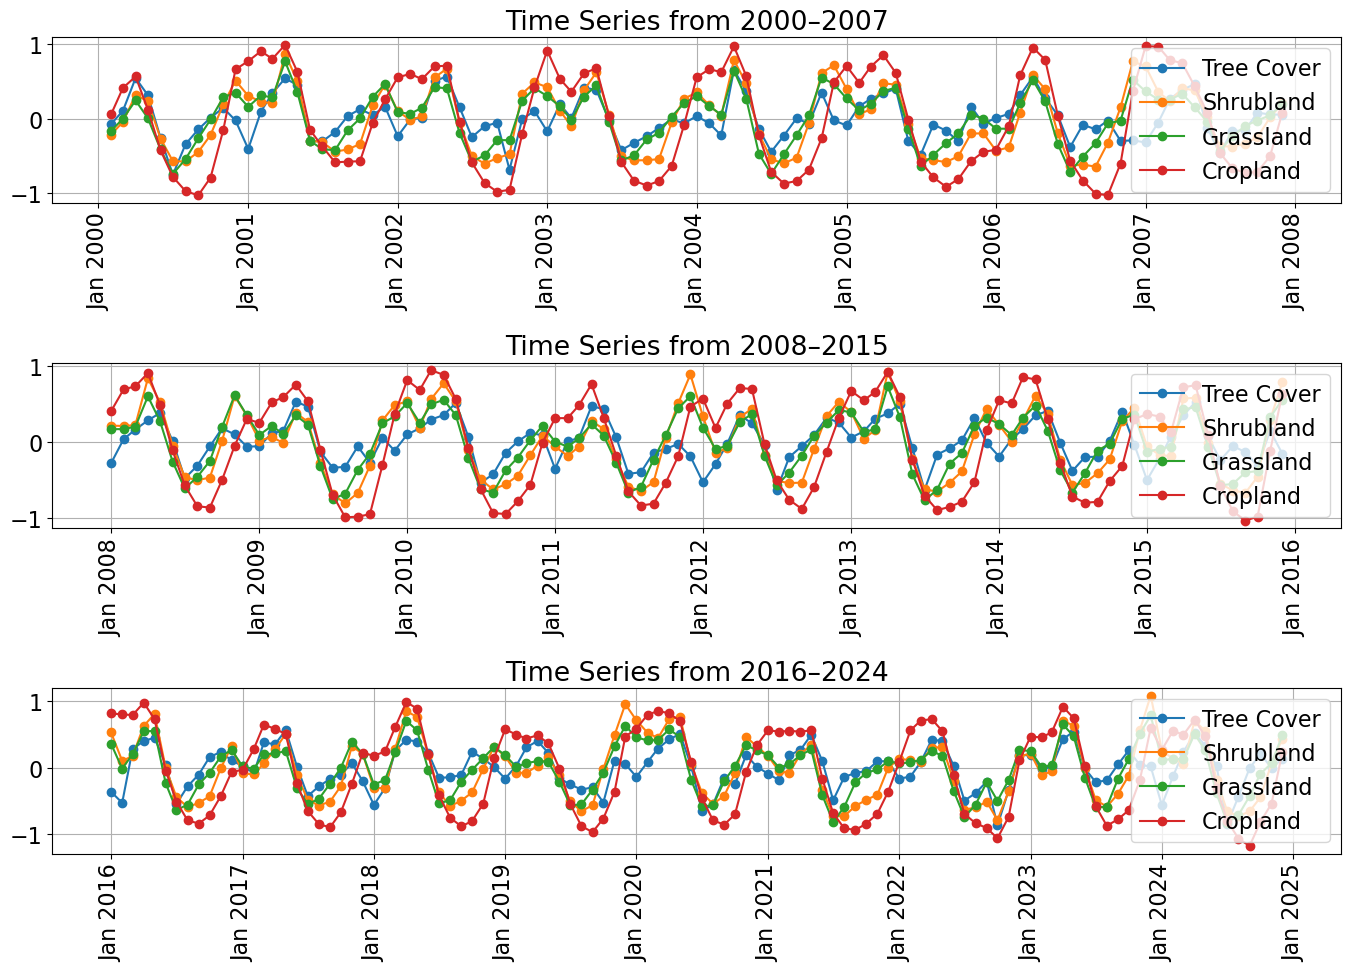

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Load your CSV data
df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv')#,
                 #index_col=0, parse_dates=True)
# Step 2: Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Step 3: Define the three periods
periods = {
    '2000–2007': ('2000-01-01', '2007-12-31'),
    '2008–2015': ('2008-01-01', '2015-12-31'),
    '2016–2024': ('2016-01-01', '2024-12-31'),
}

# Step 4: Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10), sharex=False)

# Step 5: Plot each period with pointed dashed lines
for ax, (title, (start, end)) in zip(axes, periods.items()):
    subset = df.loc[start:end]

    for column in subset.columns:
        ax.plot(subset.index, subset[column], linestyle='--', marker='o', label=column)

    ax.set_title(f"Time Series from {title}")
    ax.set_xlabel("")
    ax.grid(True)
    ax.legend()

    # Format x-axis as Month-Year and rotate labels vertically
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


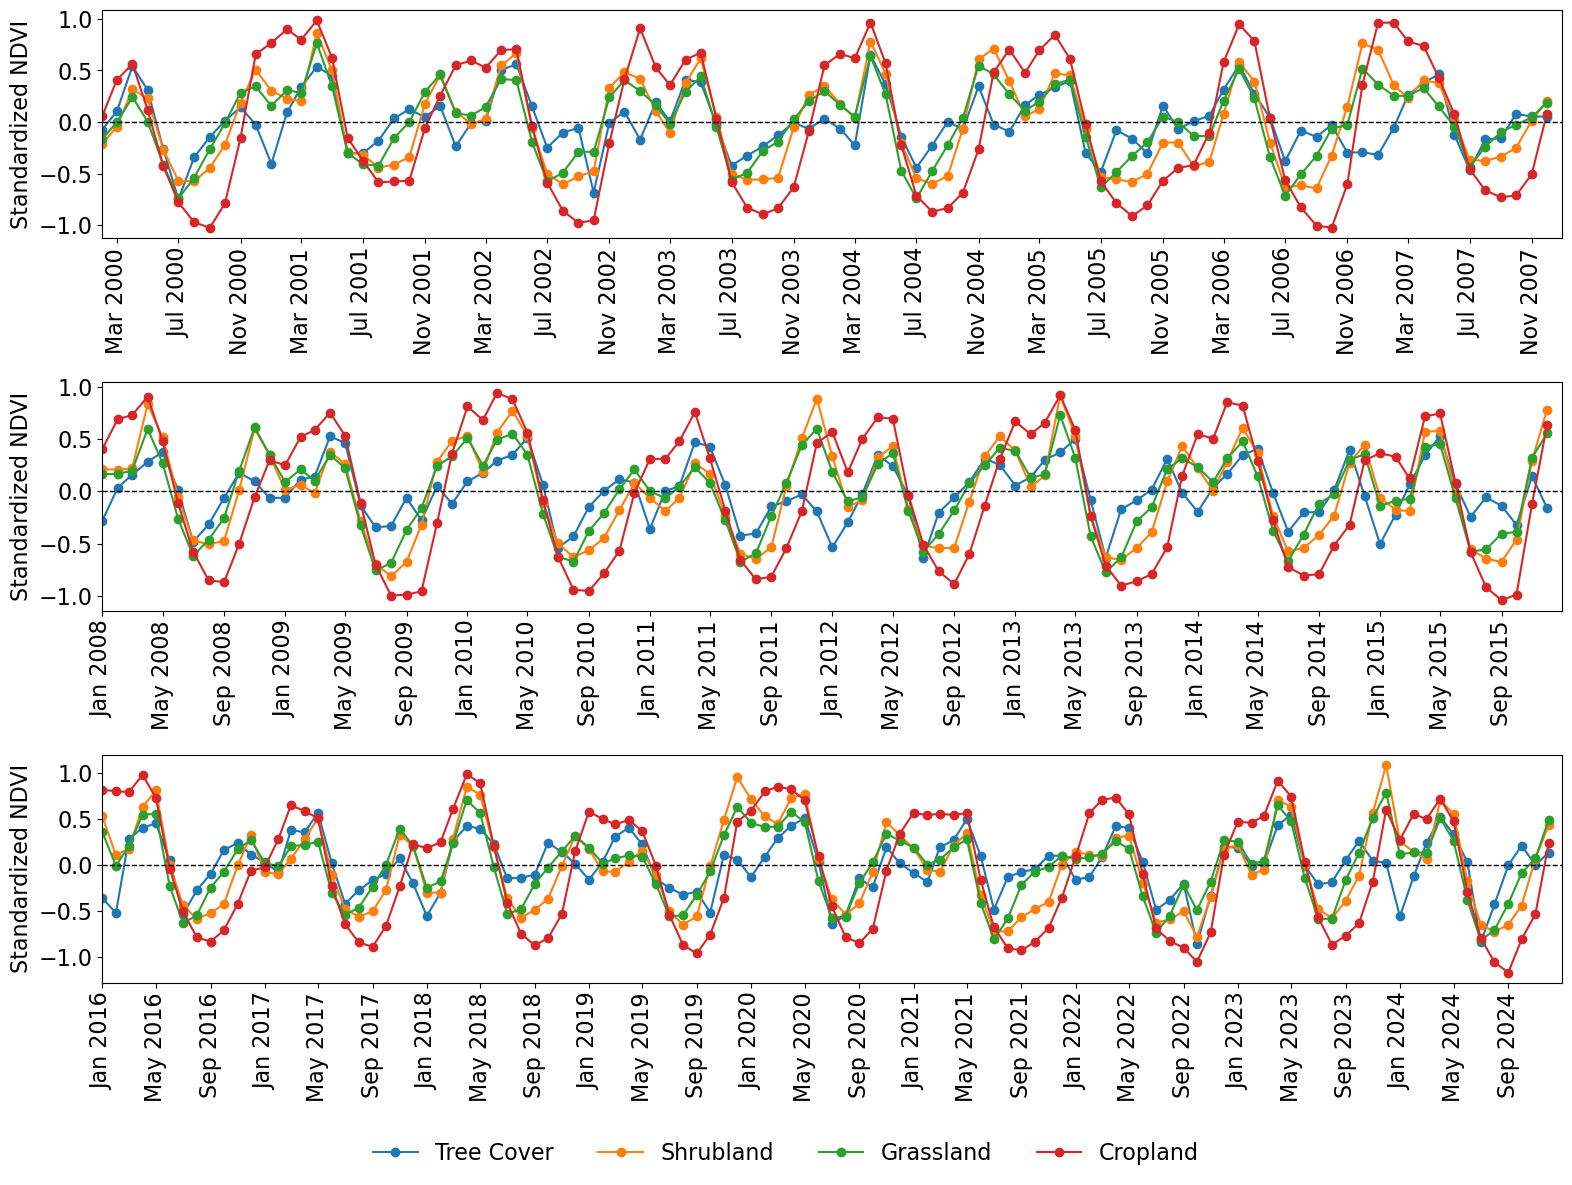

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Load the data
df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv')

# Step 2: Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Step 3: Define the three periods
periods = {
    '2000–2007': ('2000-02-01', '2007-12-31'),
    '2008–2015': ('2008-01-01', '2015-12-31'),
    '2016–2024': ('2016-01-01', '2024-12-31'),
}
mdates.MonthLocator(interval=3)  # Tick every 3 months

# Step 4: Create subplots
plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 12), sharex=False)

# Step 5: Plot with dashed lines and monthly x-axis
for ax, (title, (start, end)) in zip(axes, periods.items()):
    subset = df.loc[start:end]

    for column in subset.columns:
        ax.plot(subset.index, subset[column], marker='o', label=column)

    #ax.set_title(f"Time Series from {title}")
    ax.set_xlabel("")
    ax.set_ylabel("Standardized NDVI", fontsize = 16)
   # ax.grid(True)
    
    #ax.legend()
    # Set x-axis limits to exactly the range of the period
    ax.set_xlim(pd.to_datetime(start), pd.to_datetime(end))
    
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    
    # Set x-axis to show every month
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=90)

# Collect handles and labels from the last axes (or any axes)
handles, labels = axes[-1].get_legend_handles_labels()

# Add one big legend below all subplots
fig.legend(handles, labels, loc='lower center', ncol=len(labels), fontsize=16, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space at bottom for legend
fig.savefig('timeseries_subplots.png', dpi=300, bbox_inches='tight')  # Save high-res PNG

plt.show()

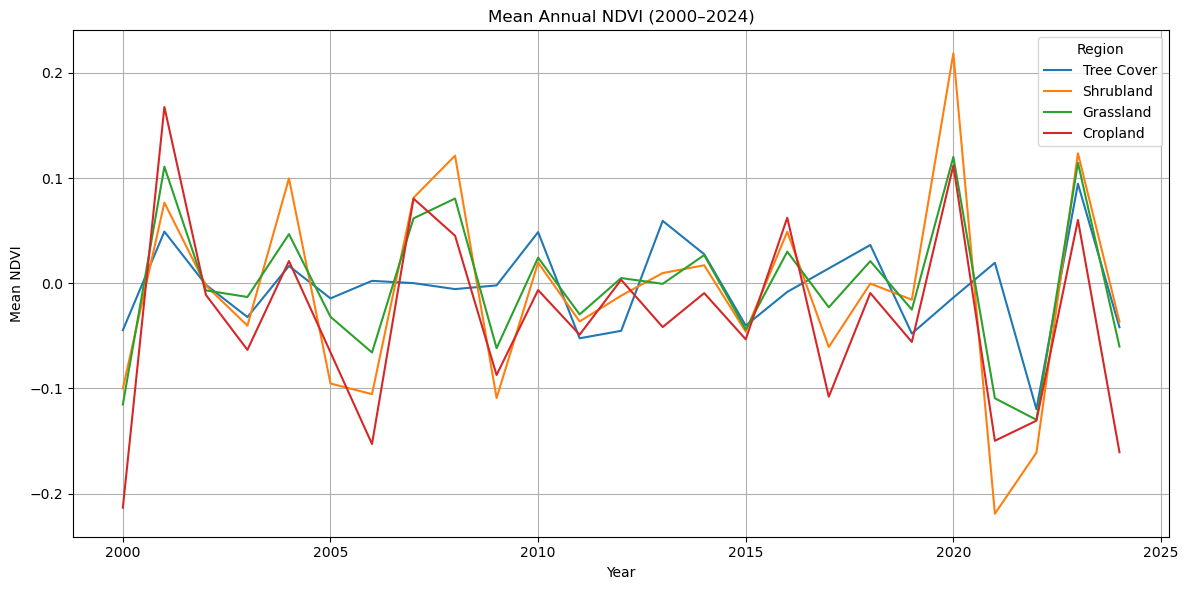

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV and parse dates
df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv', parse_dates=True, index_col=0)

# If the first column is not datetime index, uncomment the following line:
# df.index = pd.to_datetime(df.index, format='%Y-%m')

# Resample to annual means
annual_ndvi = df.resample('YE').mean()

# Plot
plt.figure(figsize=(12, 6))
for column in annual_ndvi.columns:
    plt.plot(annual_ndvi.index.year, annual_ndvi[column], label=column)

plt.title('Mean Annual NDVI (2000–2024)')
plt.xlabel('Year')
plt.ylabel('Mean NDVI')
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


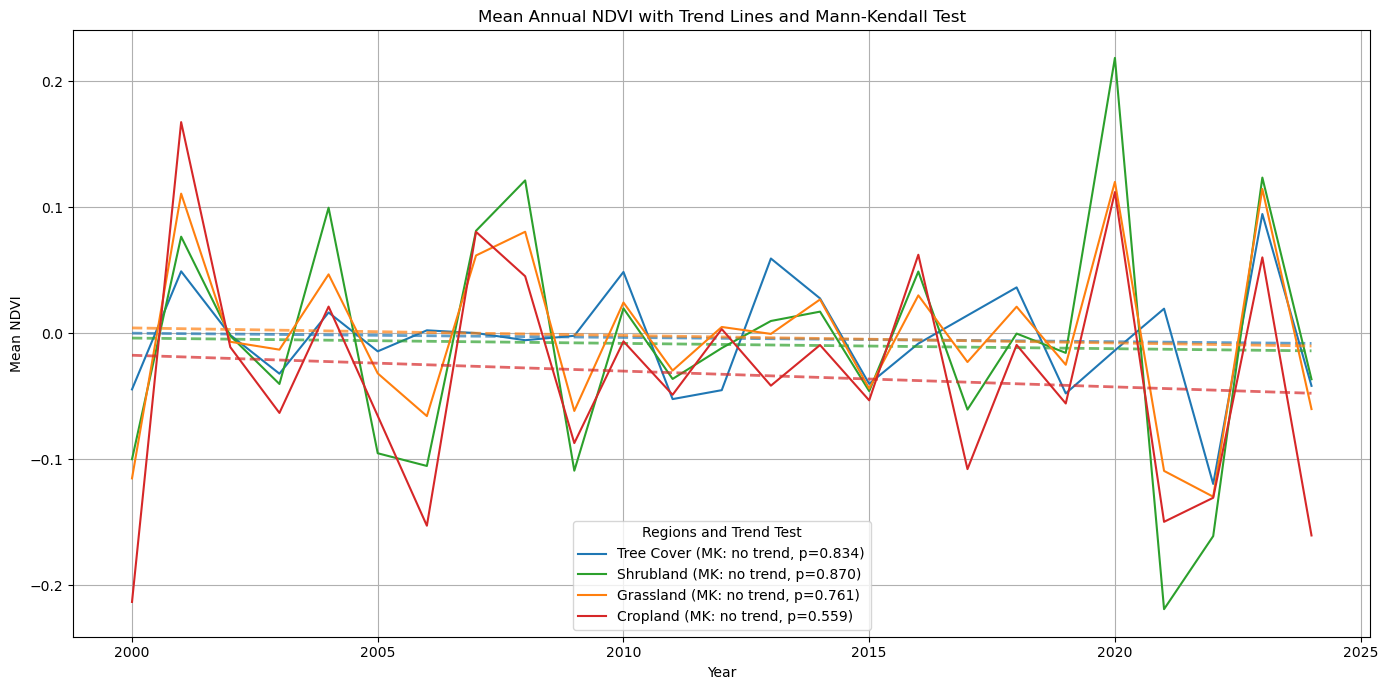

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import pymannkendall as mk

# --- Step 1: Load and prepare data ---
df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv', parse_dates=True, index_col=0)


# Create datetime index if needed (monthly)
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.date_range(start='2000-01', periods=len(df), freq='ME')

# Compute annual mean NDVI
annual_ndvi = df.resample('YE').mean()
annual_ndvi.index = annual_ndvi.index.year  # Use just the year for plotting

# --- Step 2: Plot with trend lines and Mann-Kendall results ---
plt.figure(figsize=(14, 7))
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']

for i, col in enumerate(annual_ndvi.columns):
    y = annual_ndvi[col].values
    x = annual_ndvi.index.values

    # Linear regression for trend line
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trend_line = slope * x + intercept

    # Mann-Kendall trend test
    mk_result = mk.original_test(y)

    # Plot time series
    plt.plot(x, y, label=f'{col} (MK: {mk_result.trend}, p={mk_result.p:.3f})', color=colors[i])
    plt.plot(x, trend_line, '--', color=colors[i], linewidth=2, alpha=0.7)

# --- Step 3: Plot formatting ---
plt.title('Mean Annual NDVI with Trend Lines and Mann-Kendall Test')
plt.xlabel('Year')
plt.ylabel('Mean NDVI')
plt.grid(True)
plt.legend(title='Regions and Trend Test')
plt.tight_layout()
plt.show()


/tmp/ipykernel_50515/2434451790.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv', parse_dates=True, index_col=0)


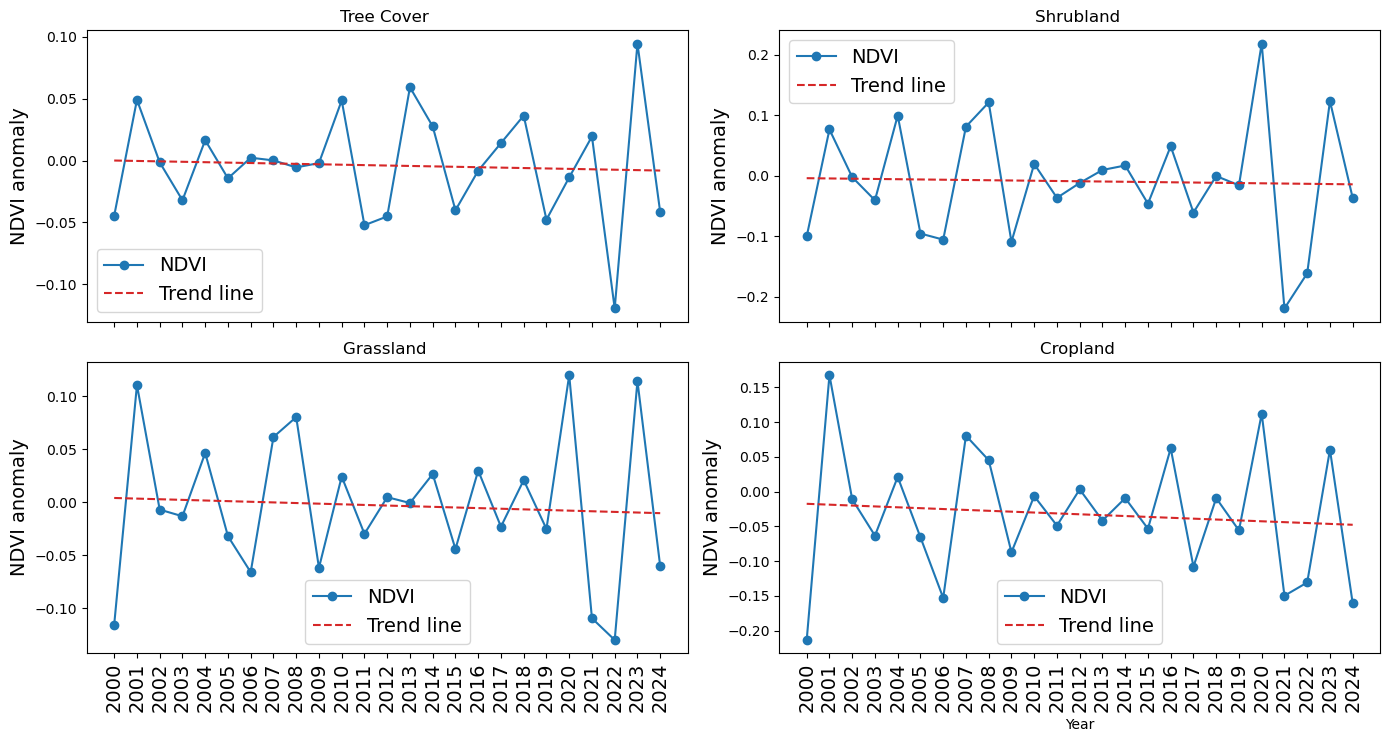

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import pymannkendall as mk

# --- Step 1: Load and prepare data ---
df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv', parse_dates=True, index_col=0)

# Create datetime index if needed (monthly)
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.date_range(start='2000-01', periods=len(df), freq='ME')

# Compute annual mean NDVI
annual_ndvi = df.resample('YE').mean()
annual_ndvi.index = annual_ndvi.index.year  # Convert to year integers

# --- Step 2: Set up subplots ---
n_cols = 2
n_rows = int(np.ceil(len(annual_ndvi.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=True)

# Flatten axes in case of multiple rows
axes = axes.flatten()

# --- Step 3: Plot each time series ---
for i, col in enumerate(annual_ndvi.columns):
    ax = axes[i]
    y = annual_ndvi[col].values
    x = annual_ndvi.index.values

    # Linear regression for trend
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trend_line = slope * x + intercept

    # Mann-Kendall test
    mk_result = mk.original_test(y)

    # Plot original series and trend
    ax.plot(x, y, label='NDVI', color='tab:blue', marker='o')
    ax.plot(x, trend_line, '--', color='tab:red', label='Trend line')

    # Title and annotation
   # ax.set_title(f'{col} (MK: {mk_result.trend}, p={mk_result.p:.3f})')
    ax.set_title(f'{col} ')
    ax.set_ylabel('NDVI anomaly', fontsize = 14)
    #ax.grid(True)
    ax.set_xticks(x)
    
    ax.set_xticklabels(x, rotation=90,fontsize = 14)
    ax.legend(fontsize = 14)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# All years on x-axis with 45° rotation


# --- Step 4: Formatting ---
#plt.suptitle('Mean Annual NDVI by Region with Trend Lines and Mann-Kendall Test', fontsize=16)
plt.xlabel('Year')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig("TS_trend.png", dpi=300)
plt.show()


/tmp/ipykernel_50515/2707654000.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv',


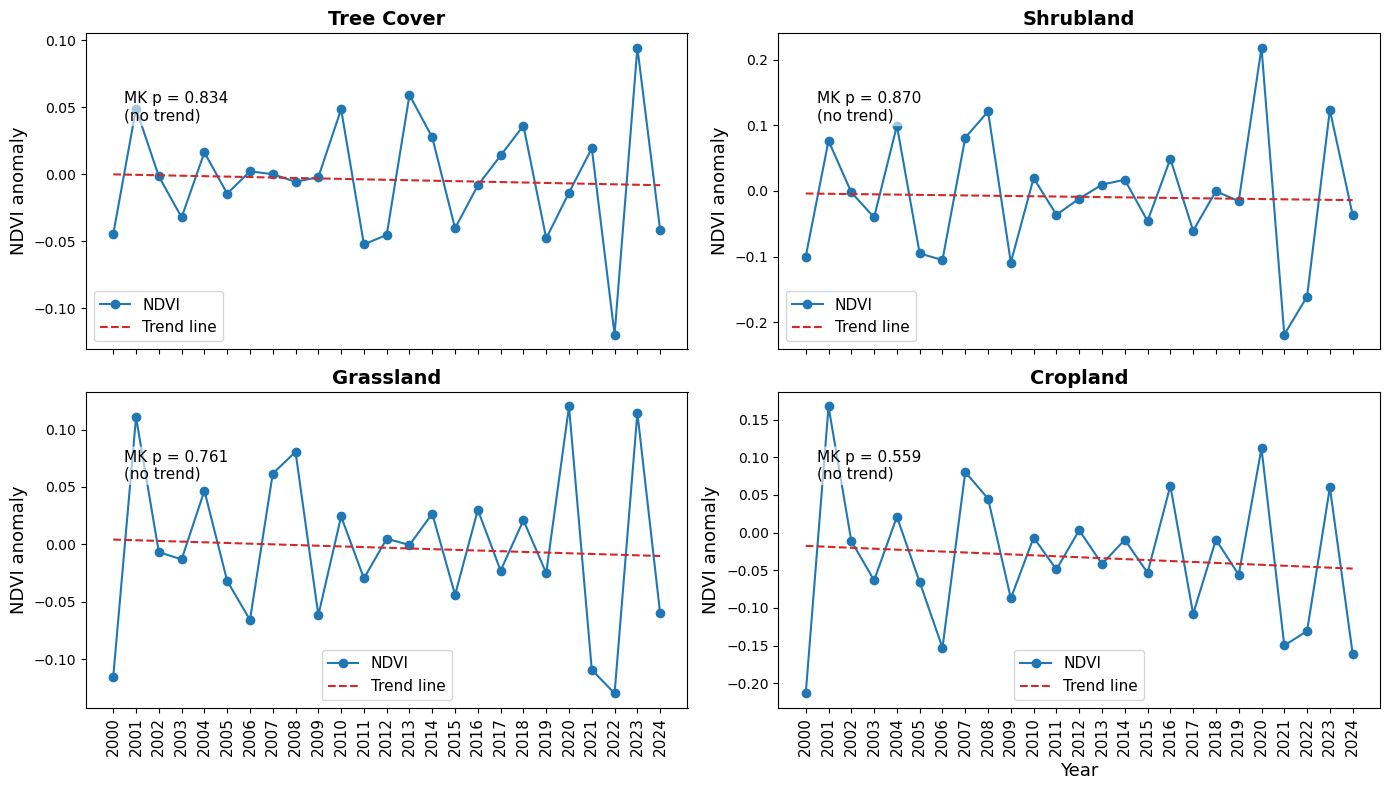

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import pymannkendall as mk

# --- Step 1: Load and prepare data ---
df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv', 
                 parse_dates=True, index_col=0)

# Create datetime index if needed (monthly)
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.date_range(start='2000-01', periods=len(df), freq='ME')

# Compute annual mean NDVI
annual_ndvi = df.resample('YE').mean()
annual_ndvi.index = annual_ndvi.index.year  # Convert to year integers

# --- Step 2: Set up subplots ---
n_cols = 2
n_rows = int(np.ceil(len(annual_ndvi.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=True)
axes = axes.flatten()

# --- Step 3: Plot each time series ---
for i, col in enumerate(annual_ndvi.columns):
    ax = axes[i]
    y = annual_ndvi[col].values
    x = annual_ndvi.index.values

    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trend_line = slope * x + intercept

    # Mann–Kendall test
    mk_result = mk.original_test(y)

    # Plot NDVI and trend line
    ax.plot(x, y, 'o-', color='tab:blue', label='NDVI')
    ax.plot(x, trend_line, '--', color='tab:red', label='Trend line')

    # --- Smart annotation placement (inside, not overlapping) ---
    y_min, y_max = np.nanmin(y), np.nanmax(y)
    y_range = y_max - y_min

    # Position text near top-left but inside
    x_pos = x[0] + (x[-1] - x[0]) * 0.02
    y_pos = y_max - 0.15 * y_range  # just below top NDVI values

    # Add MK p-value and trend text
    ax.text(x_pos, y_pos,
            f'MK p = {mk_result.p:.3f}\n({mk_result.trend})',
            fontsize=11,
            ha='left',
            va='top',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'))

    # Titles and labels
    ax.set_title(f'{col}', fontsize=14, fontweight='bold')
    ax.set_ylabel('NDVI anomaly', fontsize=13)
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=90, fontsize=11)
    ax.legend(fontsize=11)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# --- Step 4: Formatting ---
plt.xlabel('Year', fontsize=13)
plt.tight_layout()
plt.savefig("TS_trend_MK_inside_clean.png", dpi=300)
plt.show()


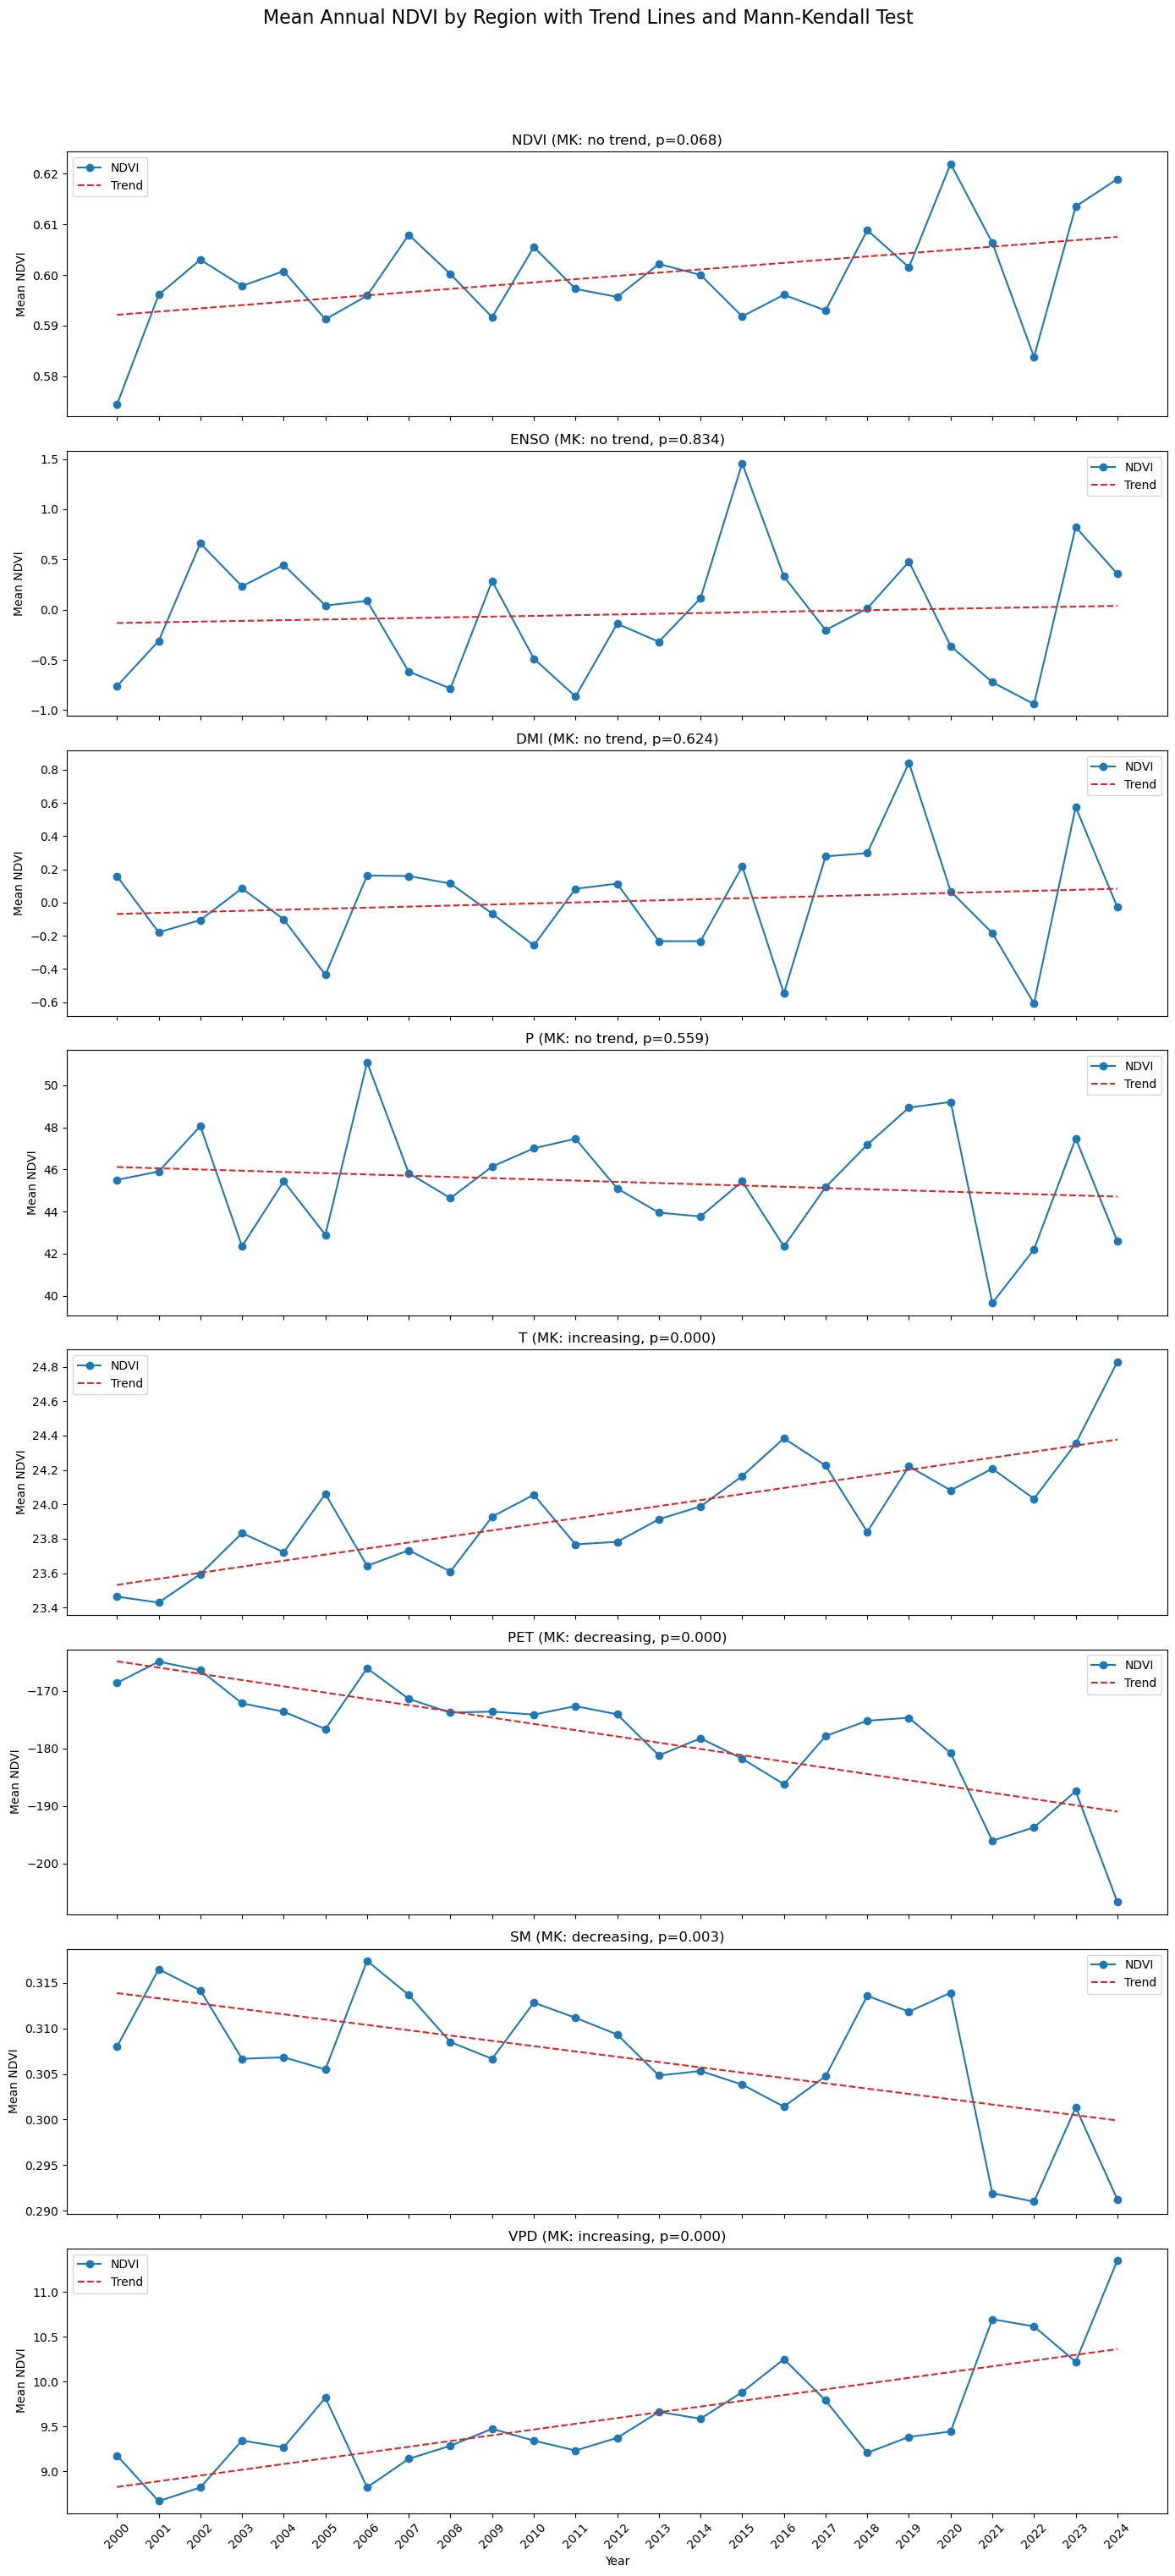

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import pymannkendall as mk

# --- Step 1: Load and prepare data ---
#df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv', parse_dates=True, index_col=0)
df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/GLKs_data.csv',
    index_col=0, parse_dates=True)

# Create datetime index if needed (monthly)
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.date_range(start='2000-01', periods=len(df), freq='ME')

# Compute annual mean NDVI
annual_ndvi = df.resample('YE').mean()
annual_ndvi.index = annual_ndvi.index.year  # Use just the year for plotting

# --- Step 2: Plot with subplots ---
n_regions = len(annual_ndvi.columns)
fig, axes = plt.subplots(n_regions, 1, figsize=(14, 4 * n_regions), sharex=True)
if n_regions == 1:
    axes = [axes]  # Ensure it's iterable

x = annual_ndvi.index.values  # All years for x-axis

for i, col in enumerate(annual_ndvi.columns):
    ax = axes[i]
    y = annual_ndvi[col].values

    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trend_line = slope * x + intercept

    # Mann-Kendall test
    mk_result = mk.original_test(y)

    # Plot NDVI and trend
    ax.plot(x, y, label='NDVI', color='tab:blue', marker='o')
    ax.plot(x, trend_line, '--', color='tab:red', label='Trend')

    # Titles and annotations
    ax.set_title(f'{col} (MK: {mk_result.trend}, p={mk_result.p:.3f})')
    ax.set_ylabel('Mean NDVI')
   # ax.grid(True)
    ax.legend()

    # All years on x-axis with 45° rotation
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=45)

# Common X-axis label and layout
axes[-1].set_xlabel('Year')
plt.suptitle('Mean Annual NDVI by Region with Trend Lines and Mann-Kendall Test', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/tmp/ipykernel_50515/2752395602.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv',


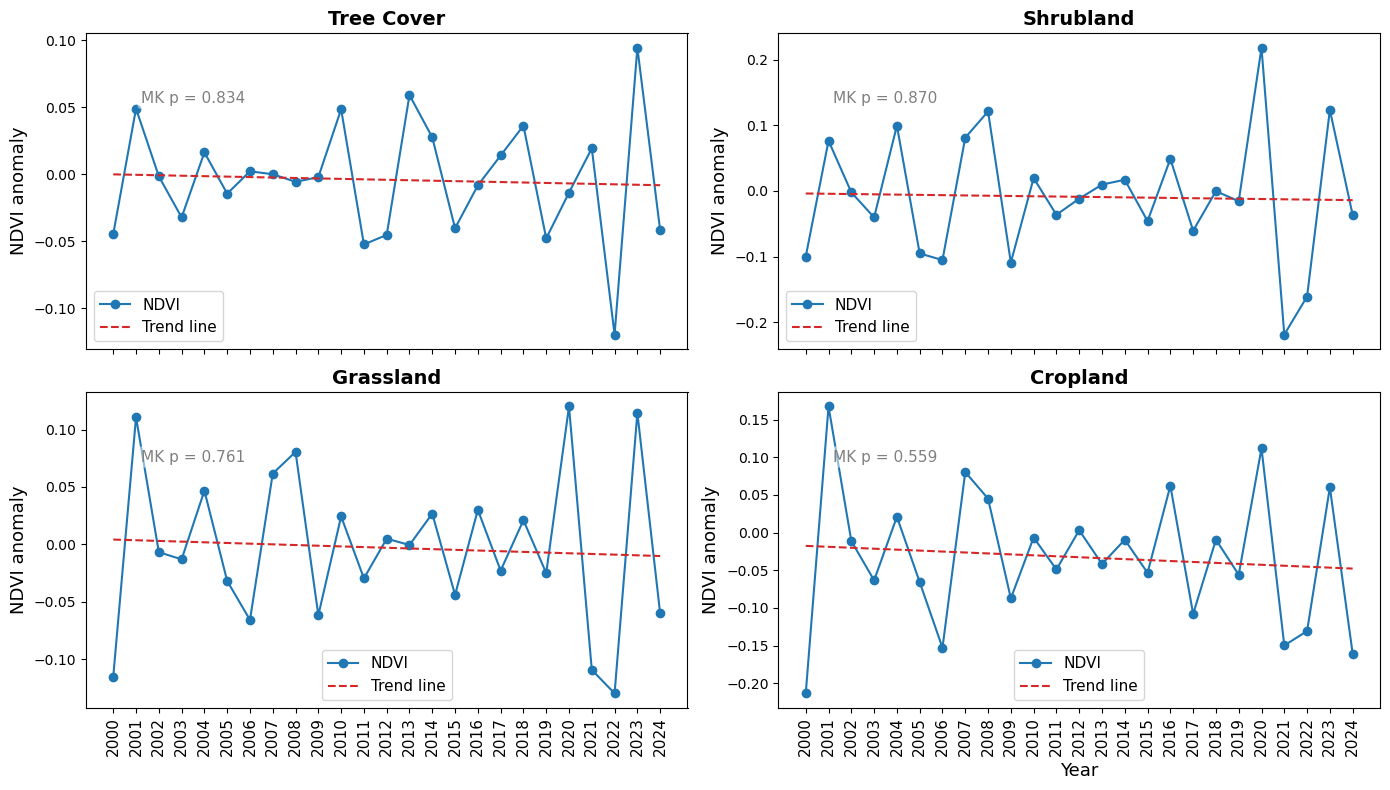

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import pymannkendall as mk

# --- Step 1: Load and prepare data ---
df = pd.read_csv('/home/pacifique/project_hybrid_causal_prediction_model-main/data/STD_NDVI.csv', 
                 parse_dates=True, index_col=0)

# Create datetime index if needed (monthly)
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.date_range(start='2000-01', periods=len(df), freq='ME')

# Compute annual mean NDVI
annual_ndvi = df.resample('YE').mean()
annual_ndvi.index = annual_ndvi.index.year

# --- Step 2: Setup subplots ---
n_cols = 2
n_rows = int(np.ceil(len(annual_ndvi.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=True)
axes = axes.flatten()

# --- Step 3: Plot each time series ---
for i, col in enumerate(annual_ndvi.columns):
    ax = axes[i]
    y = annual_ndvi[col].values
    x = annual_ndvi.index.values

    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trend_line = slope * x + intercept

    # Mann–Kendall test
    mk_result = mk.original_test(y)

    # Plot NDVI + trend line
    ax.plot(x, y, 'o-', color='tab:blue', label='NDVI')
    ax.plot(x, trend_line, '--', color='tab:red', label='Trend line')

    # Déterminer la zone libre pour l’annotation
    y_min, y_max = np.nanmin(y), np.nanmax(y)
    y_range = y_max - y_min

    # Si la tendance est à la hausse → placer en bas
    # Si à la baisse → placer en haut
    if slope > 0:
        y_pos = y_min + 0.15 * y_range
        va = 'bottom'
    else:
        y_pos = y_max - 0.15 * y_range
        va = 'top'

    x_pos = x[0] + (x[-1] - x[0]) * 0.05

    # Choix de couleur selon la tendance
    trend_color = {'increasing': 'green', 'decreasing': 'red', 'no trend': 'gray'}[mk_result.trend]

    # Annotation intelligente
    ax.text(x_pos, y_pos,
            f'MK p = {mk_result.p:.3f}',
            fontsize=11, ha='left', va=va,
            color=trend_color,
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.2'))

    # Titres et axes
    ax.set_title(f'{col}', fontsize=14, fontweight='bold')
    ax.set_ylabel('NDVI anomaly', fontsize=13)
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=90, fontsize=11)
    ax.legend(fontsize=11)

# Supprimer les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# --- Step 4: Mise en forme finale ---
plt.xlabel('Year', fontsize=13)
plt.tight_layout()
plt.savefig("TS_trend_MK_auto_place.png", dpi=300)
plt.show()
